In [4]:
from google import genai
from dotenv import load_dotenv
_ = load_dotenv()
model_str = "gemini-2.0-flash-exp"

In [3]:
client = genai.Client()

In [8]:
response = client.models.generate_content(model=model_str, contents="How does AI work?")
print(response.text)

The world of AI is vast and complex, but at its core, it's about getting computers to perform tasks that typically require human intelligence. Here's a breakdown of how AI works, focusing on the most common types:

**1. Fundamental Concepts:**

* **Data:** AI systems learn from data. The more data they have, the better they can learn and perform. This data can be anything from text and images to numbers and sounds.
* **Algorithms:** These are sets of rules that tell the computer how to process data. AI uses specific algorithms designed for learning and problem-solving.
* **Models:** After training on data using algorithms, the computer creates a model. This model represents the learned patterns and relationships in the data. It's what allows the AI to make predictions or decisions.

**2. Key Types of AI & How They Work:**

* **Machine Learning (ML):** This is the most common type of AI. Instead of being explicitly programmed, ML algorithms learn from data.
    * **Supervised Learning:*

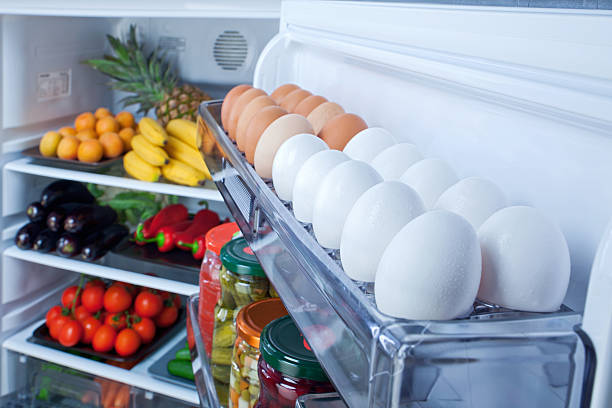

In [102]:
from PIL import Image

image = Image.open('images/fridge-2.jpg')
image

In [25]:
from IPython.display import display, Markdown
import pprint

In [103]:
# Use Gemini to detect the ingredients in the image

ingredients_response = client.models.generate_content(contents=[image, 'Identify the ingredients shown in the image. List the ingredient the quantity shown'], model=model_str)

In [104]:
display(Markdown(ingredients_response.text))

Certainly! Here's a breakdown of the ingredients and their approximate quantities in the refrigerator image:

**Fruits:**

*   Pineapple: 1
*   Bananas: a bunch, approximately 8-10
*   Oranges: a pile, approximately 15-20

**Vegetables:**

*   Tomatoes (on the vine): a bunch, approximately 12-15
*   Red peppers: 6-8
*   Eggplants: about 6, stacked in two rows
*    Green pepper: small piece in the bottom of fridge.

**Other:**

*   Eggs (brown): 10
*   Eggs (white): 15
*   Pickled Jars: 5-6 (including jar containing something red)

In [121]:
# Output in a structured response
from pydantic import BaseModel
from typing import List
from google.genai import types

response_schema = {
    "type": "array",
    "items": {
        "type": "object",
        "properties": {
            "name": {
                "type": "string",
            },
            "quantity": {
                "type": "integer",
            },
        },
        "required": ["name", 'quantity'],
    },
}
ingredients_structured_response = client.models.generate_content(
    contents=[image,'Identify the ingredients shown in the image. List all the items shown in the image.'],
    model=model_str,
    config=types.GenerateContentConfig(response_mime_type='application/json',
            response_schema=response_schema
    )
)

In [122]:
# Read output into a dataframe
import pandas as pd
import json
df = pd.DataFrame(json.loads(ingredients_structured_response.text))

In [123]:
COLUMN_ORDER = ['name', 'quantity']
df[COLUMN_ORDER]

,name,quantity
0,pineapple,1
1,oranges,12
2,bananas,7
3,eggplant,10
4,peppers,7
5,tomatoes,18
6,eggs,20
7,jars,5
8,pickles,1


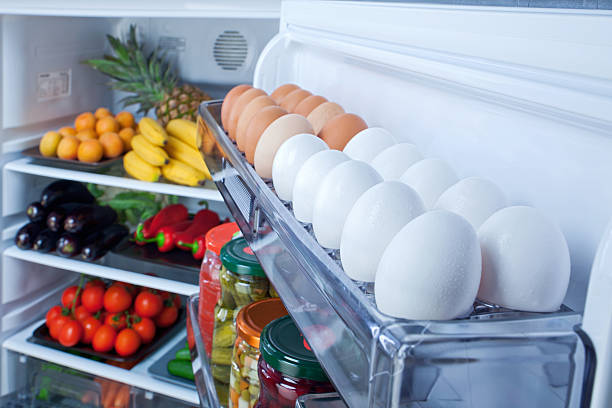

In [108]:
image